<a href="https://colab.research.google.com/github/itsmekarishma/Karishma_Portfolio/blob/main/Financial_Inclusions_in_Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error
import warnings

Loading the train & test datasets

In [ ]:
#Import dataset
test = pd.read_csv("/content/Test[1].csv")
train = pd.read_csv("/content/Train[1].csv")

In [ ]:
# shape of data
print("shape of test data:",test.shape)
print("shape of train data:",train.shape)

shape of test data: (10086, 12)
shape of train data: (23524, 13)


In [ ]:
# inspect train data
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# check submission file
ss = pd.read_csv("/content/SampleSubmission[1].csv")
ss.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


In [ ]:
# show some information about the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


Data Analysis

In [ ]:
# Frequency table of a variable will give us the count of each category in that Target variable.
count = train['bank_account'].value_counts()
perc = train['bank_account'].value_counts(normalize=True)
pd.concat([count,perc],axis=1,keys=['count','percentage'])

,count,percentage
No,20212,0.859208
Yes,3312,0.140792


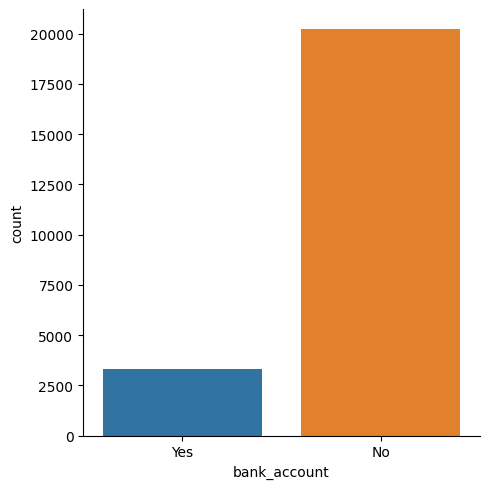

In [ ]:
# Explore Target distribution
sns.catplot(x='bank_account',kind='count',data=train)

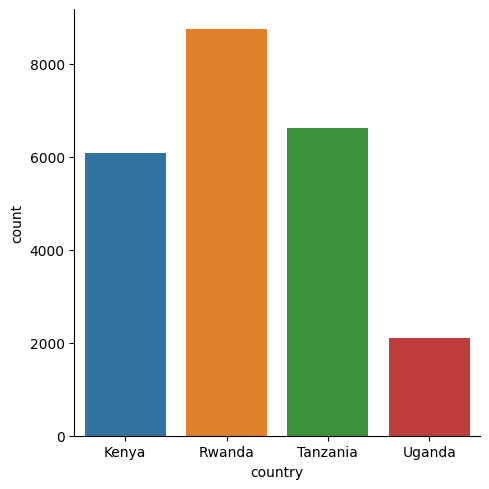

In [ ]:
# Explore Country distribution
sns.catplot(x='country',kind='count',data=train)

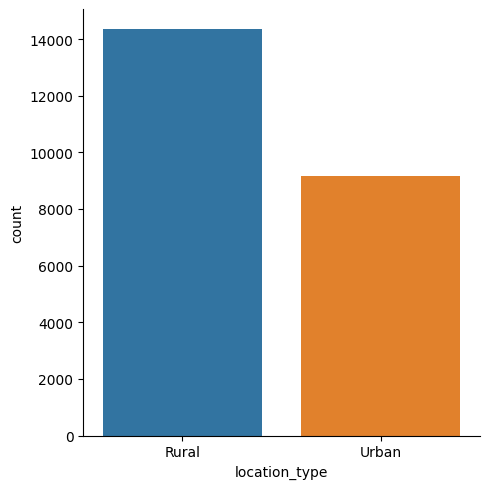

In [ ]:
# Explore Location distribution
sns.catplot(x='location_type',kind='count',data=train)

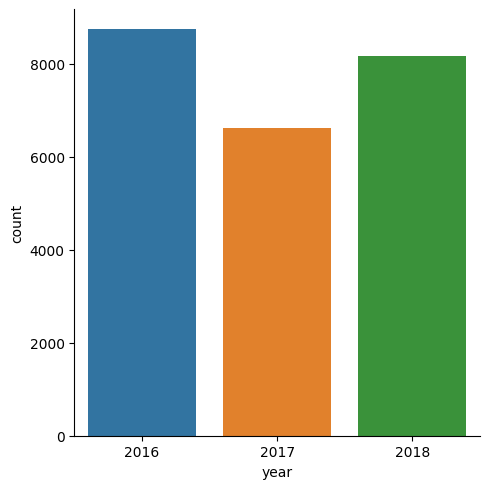

In [ ]:
# Explore Year distribution
sns.catplot(x='year',kind='count',data=train)

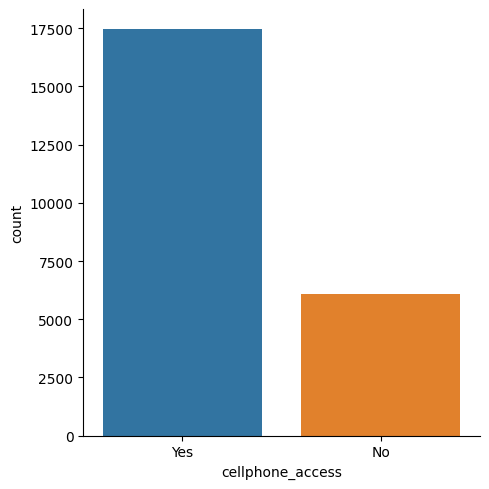

In [ ]:
# Explore Cellphone Access distribution
sns.catplot(x='cellphone_access',kind='count',data=train)

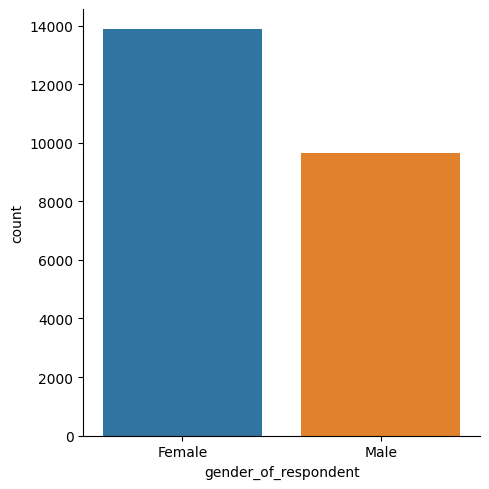

In [ ]:
# Explore gender_of_respondent distribution
sns.catplot(x='gender_of_respondent',kind='count',data=train)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

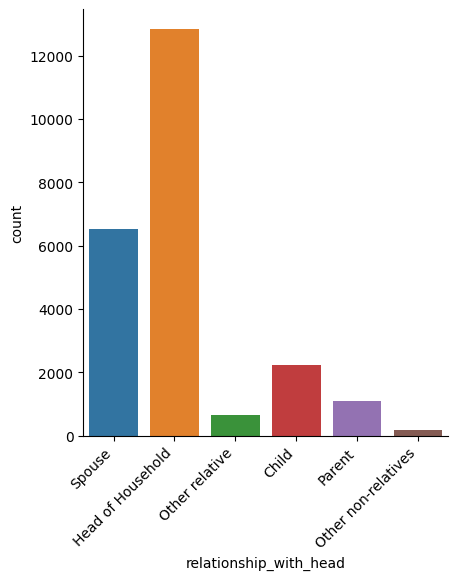

In [ ]:
# Explore relationship_with_head distribution
sns.catplot(x='relationship_with_head',kind='count',data=train)
plt.xticks(rotation=45,horizontalalignment='right')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Married/Living together'),
  Text(1, 0, 'Widowed'),
  Text(2, 0, 'Single/Never Married'),
  Text(3, 0, 'Divorced/Seperated'),
  Text(4, 0, 'Dont know')])

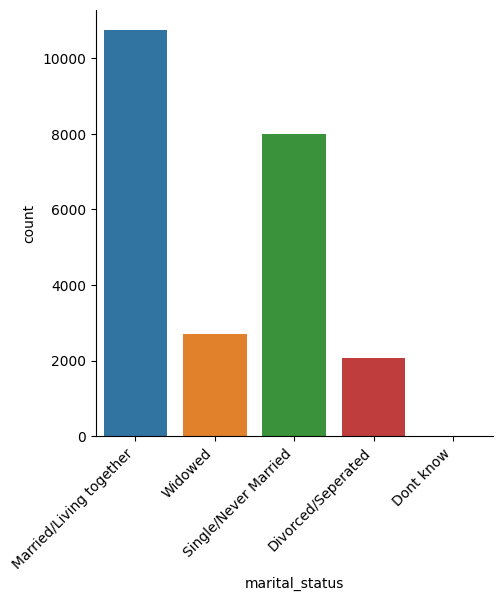

In [ ]:
# Explore  marital_status distribution
sns.catplot(x='marital_status',kind='count',data=train)
plt.xticks(rotation=45,horizontalalignment='right')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Secondary education'),
  Text(1, 0, 'No formal education'),
  Text(2, 0, 'Vocational/Specialised training'),
  Text(3, 0, 'Primary education'),
  Text(4, 0, 'Tertiary education'),
  Text(5, 0, 'Other/Dont know/RTA')])

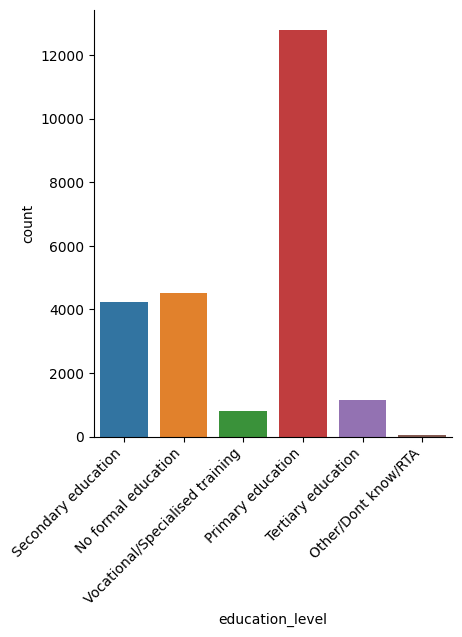

In [ ]:
# Explore  education_level distribution
sns.catplot(x='education_level',kind='count',data=train)
plt.xticks(rotation=45,horizontalalignment='right')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Self employed'),
  Text(1, 0, 'Government Dependent'),
  Text(2, 0, 'Formally employed Private'),
  Text(3, 0, 'Informally employed'),
  Text(4, 0, 'Formally employed Government'),
  Text(5, 0, 'Farming and Fishing'),
  Text(6, 0, 'Remittance Dependent'),
  Text(7, 0, 'Other Income'),
  Text(8, 0, 'Dont Know/Refuse to answer'),
  Text(9, 0, 'No Income')])

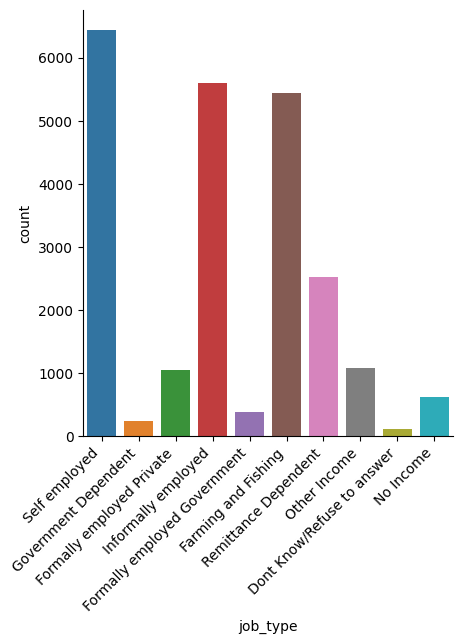

In [ ]:
# Explore  job_type distribution
sns.catplot(x='job_type',kind='count',data=train)
plt.xticks(rotation=45,horizontalalignment='right')

Text(0.5, 0, 'Household  size')

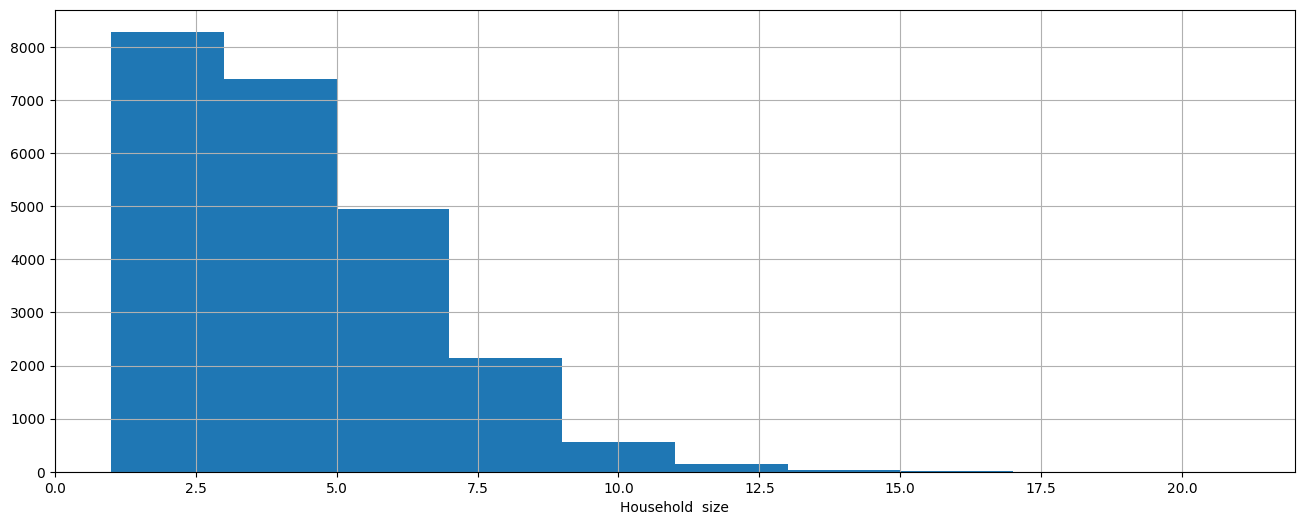

In [ ]:
# Explore  household_size distribution
plt.figure(figsize=(16, 6))
train['household_size'].hist()
plt.xlabel('Household  size')

Text(0.5, 0, 'Age of respondent')

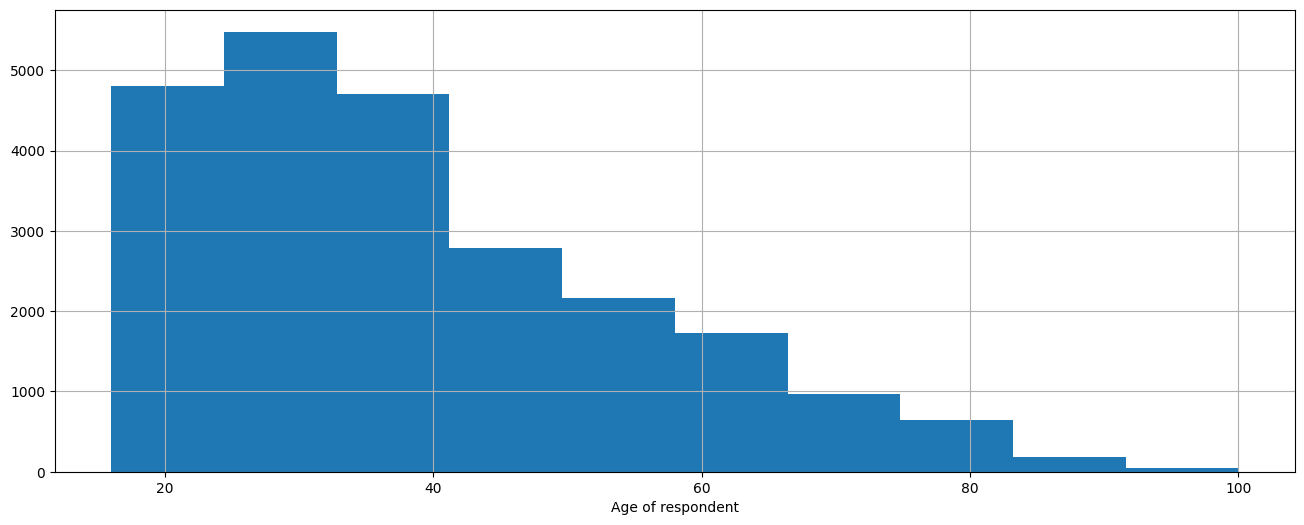

In [ ]:
# Explore  age of respondent distribution
plt.figure(figsize=(16, 6))
train['age_of_respondent'].hist()
plt.xlabel('Age of respondent')

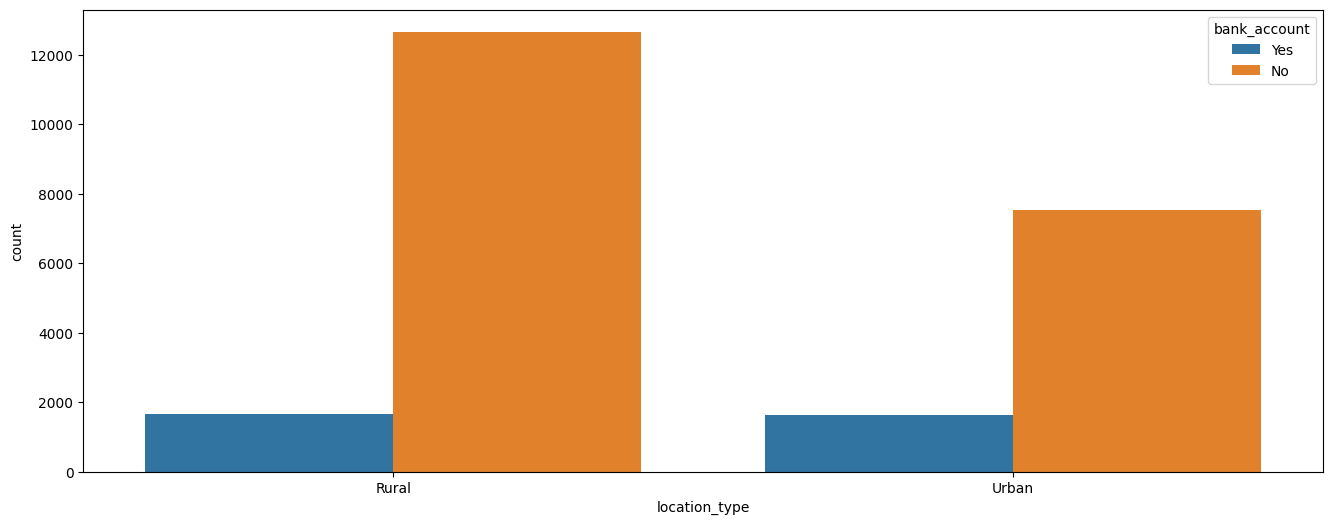

In [ ]:
#Explore location type  vs bank account

plt.figure(figsize=(16, 6))
sns.countplot(x='location_type',hue='bank_account',data=train)
plt.show()

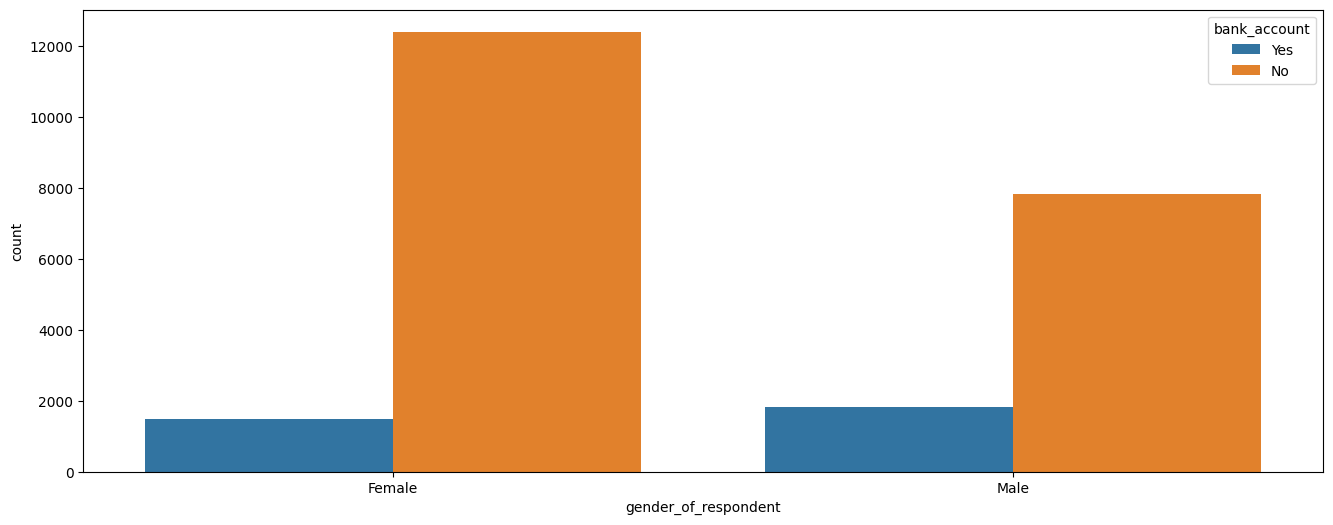

In [ ]:
#Explore gender_of_respondent  vs bank account

plt.figure(figsize=(16, 6))
sns.countplot(x='gender_of_respondent',hue='bank_account',data=train)
plt.show()

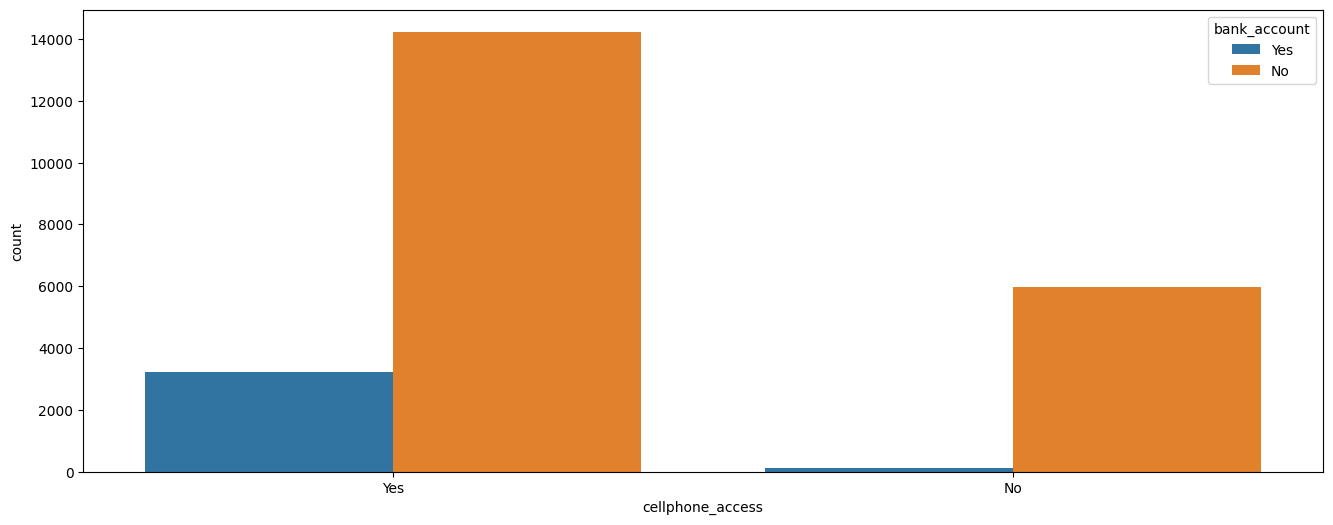

In [ ]:
#Explore cellphone_access  vs bank account

plt.figure(figsize=(16, 6))
sns.countplot(x='cellphone_access',hue='bank_account',data=train)
plt.show()

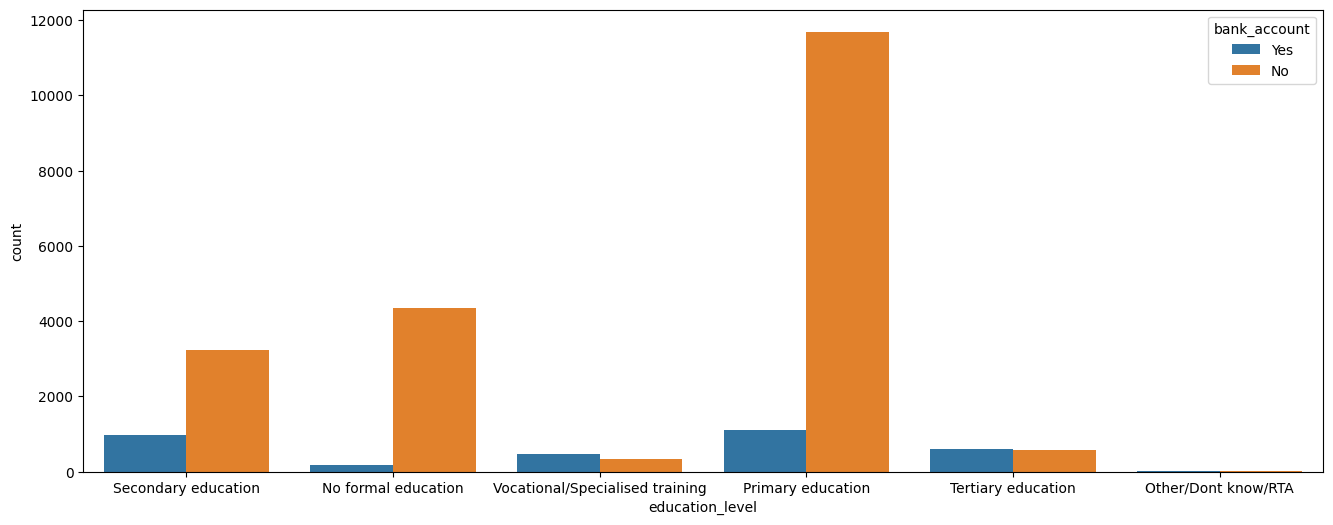

In [ ]:
#Explore education_level  vs bank account

plt.figure(figsize=(16, 6))
sns.countplot(x='education_level',hue='bank_account',data=train)
plt.show()

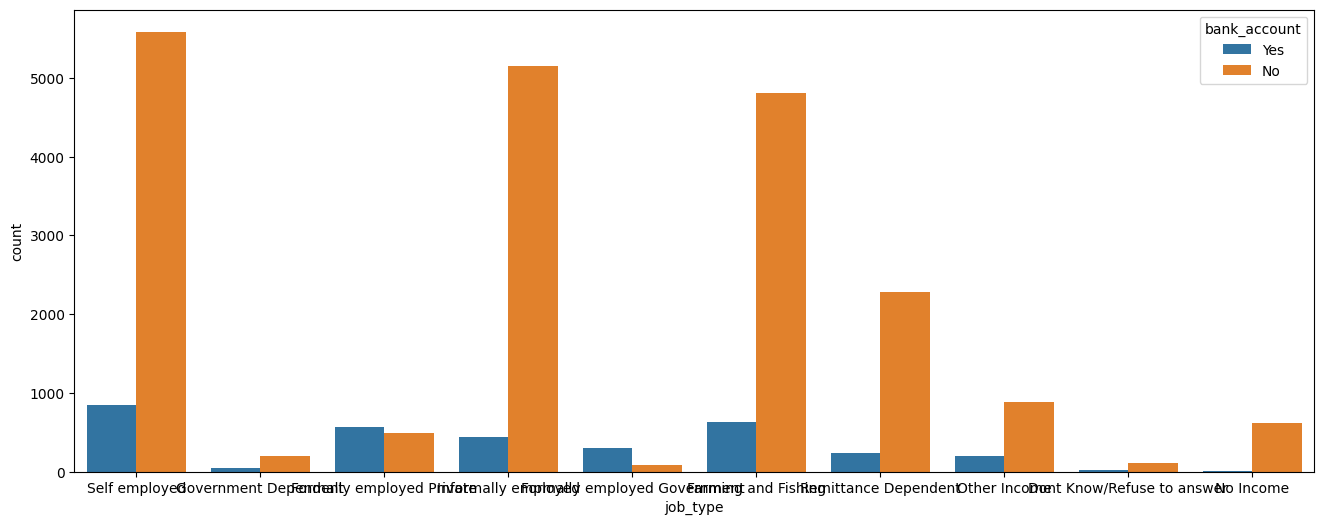

In [ ]:
#Explore job_type  vs bank account

plt.figure(figsize=(16, 6))
sns.countplot(x='job_type',hue='bank_account',data=train)
plt.show()

In [ ]:
# importing data profiling package
from pandas_profiling import ProfileReport


In [ ]:
eda_report = pandas_profiling.ProfileReport(data)


NameError: ignored